In [1]:
import torch
from math import exp
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from torch.distributions.normal import Normal


from infrastructure import Mixture, Normal, RepeatedSampler, RepeatedSamplerWrapper, RandomWalkGaussianProposal, MALA, ULA

(-4*x*exp(25/2)*exp(10*x) - 2*x*exp(5*x) - x*exp(-75/2) - 10*exp(5*x) - 10*exp(-75/2))/(4*exp(25/2)*exp(10*x) + 2*exp(5*x) + exp(-75/2))


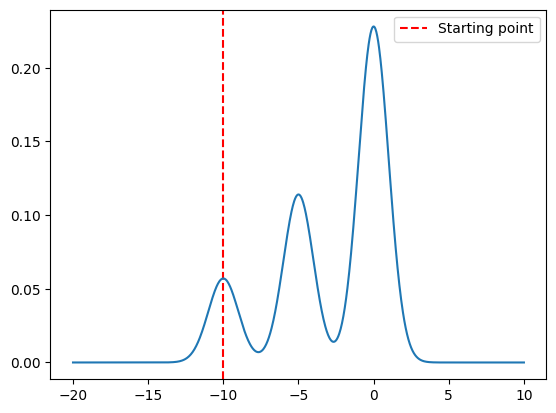

In [2]:
Target_3 = Mixture([Normal(-10, 1), Normal(-5, 1), Normal(0, 1)], [1, 2, 4])

Target_3.plot_pdf(torch.tensor(np.linspace(-20, 10, 1000)), starting=-10)

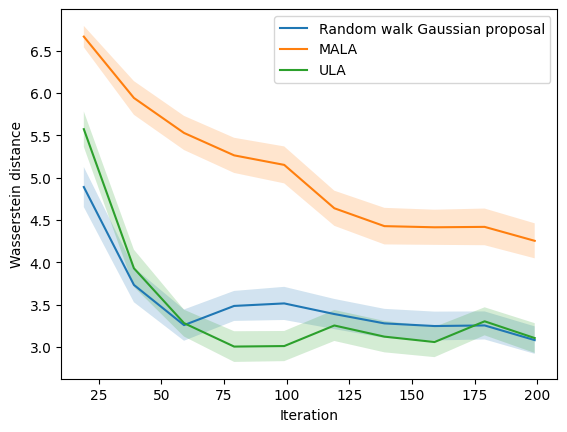

In [3]:
samplers = [
RepeatedSampler({"p":Target_3, "q": RandomWalkGaussianProposal(2)}),
RepeatedSampler({"p":Target_3, "q": MALA(1, Target_3.score)}),
RepeatedSampler({"p":Target_3, "q": MALA(1, Target_3.score, str_rep="ULA")}, sampler=ULA),
            ]


RepeatedSamplerWrapper().plot(samplers, sample_args={"repetitions": 100, "sample_length": 200, "x0": torch.tensor(-10), "burnin": 0}, 
                            plot_args={"window_width": 20})

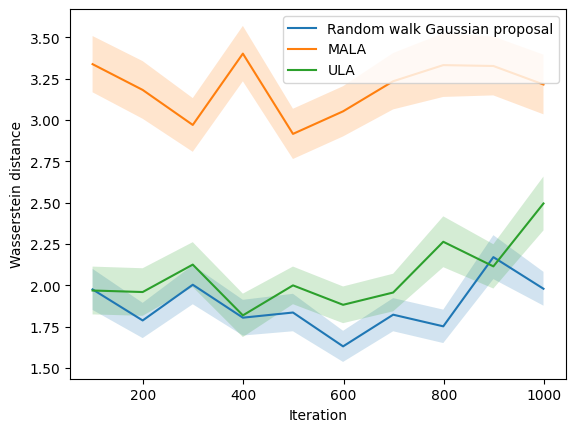

In [4]:
samplers = [
RepeatedSampler({"p":Target_3, "q": RandomWalkGaussianProposal(2)}),
RepeatedSampler({"p":Target_3, "q": MALA(1, Target_3.score)}),
RepeatedSampler({"p":Target_3, "q": MALA(1, Target_3.score, str_rep="ULA")}, sampler=ULA),
            ]


RepeatedSamplerWrapper().plot(samplers, sample_args={"repetitions": 100, "sample_length": 1000, "x0": torch.tensor(-10), "burnin": 200}, 
                              plot_args={"window_width": 100})
